# Lien vers kaggle pour le database : 
https://www.kaggle.com/datasets/alessiocorrado99/animals10/data

# Traitement et sauvegard d'images

In [4]:
import os
import cv2
def process_images(input_dir, output_dir, resize_factor=0.5, compression_quality=30):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    # Iterate through each folder (each animal) in the input directory
    for animal in os.listdir(input_dir):
        animal_path = os.path.join(input_dir, animal)
        if os.path.isdir(animal_path):
            # Create the corresponding output directory for each animal
            output_animal_path = os.path.join(output_dir, animal)
            if not os.path.exists(output_animal_path):
                os.makedirs(output_animal_path)
            # Process each image in the animal folder
            for img_name in os.listdir(animal_path):
                img_path = os.path.join(animal_path, img_name)
                if img_path.endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                    # Read the image
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    # Resize the image
                    width = int(img.shape[1] * resize_factor)
                    height = int(img.shape[0] * resize_factor)
                    dim = (width, height)
                    resized_img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
                    # Apply Canny edge detection
                    edges = cv2.Canny(resized_img, 100, 200)
                    
                    # Save the edge-detected image with high compression
                    output_img_path = os.path.join(output_animal_path, img_name)
                    cv2.imwrite(output_img_path, edges, [cv2.IMWRITE_JPEG_QUALITY, compression_quality])
# Define the input and output directories
input_dir = 'archive(7)\\raw-img'
output_dir = 'images'
# Process the images
process_images(input_dir, output_dir, resize_factor=0.5, compression_quality=30)


Edge detection, resizing, and compression processing complete.


# Creation du model

Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.
Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 699s 1s/step - accuracy: 0.3497 - loss: 1.9049 - val_accuracy: 0.4327 - val_loss: 1.6077
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 662s 1s/step - accuracy: 0.4582 - loss: 1.5321 - val_accuracy: 0.4539 - val_loss: 1.5615
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 658s 1s/step - accuracy: 0.4934 - loss: 1.4420 - val_accuracy: 0.4598 - val_loss: 1.5457
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 657s 1s/step - accuracy: 0.5169 - loss: 1.3708 - val_accuracy: 0.4564 - val_loss: 1.5965
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 650s 993ms/step - accuracy: 0.5484 - loss: 1.2840 - val_accuracy: 0.4648 - val_loss: 1.5590
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 647s 988ms/step - accuracy: 0.5718 - loss: 1.2171 - val_accuracy: 0.4533 - val_loss: 1.6258
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 648s 990ms/step - accuracy: 0

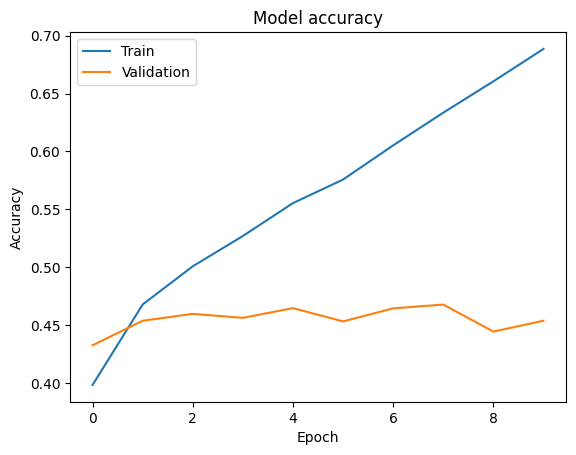

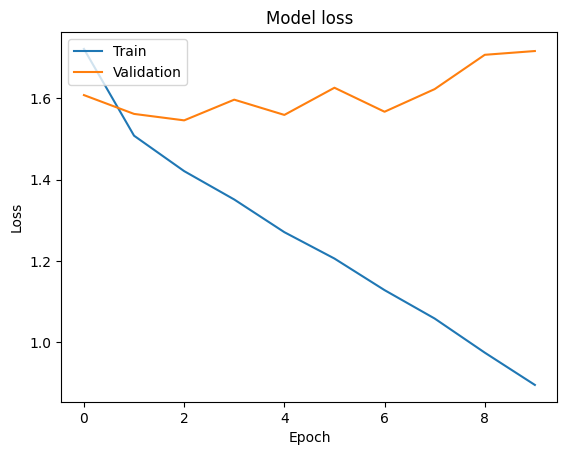

In [5]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define paths
dataset_dir = 'images'

# Load dataset and split into training, validation, and test sets
train_dataset = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

val_dataset = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

# Define the base model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Add new layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_dataset.class_names), activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Sauvegard du model

In [60]:
# Save the model
model.save('my_model.h5')


# Example d'utilisation du model

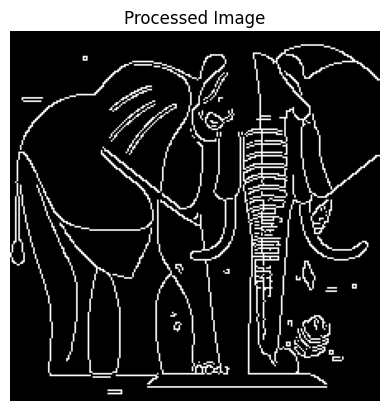

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted class: elefante


In [61]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

import cv2
import numpy as np
import matplotlib.pyplot as plt


def preprocess_image(img_path):
    # Load the image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize the image to match the input size of the model
    img_resized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
    
    # Apply Canny edge detection
    edges = cv2.Canny(img_resized, 100, 200)
    
    # Convert edges to a 3-channel image
    edges_3ch = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    
    # Normalize the image
    edges_3ch = edges_3ch / 255.0
    
    # Convert to uint8 to avoid errors
    edges_3ch = (edges_3ch * 255).astype(np.uint8)
    
    # Expand dimensions to match the input shape of the model
    edges_3ch = np.expand_dims(edges_3ch, axis=0)
    
    # Display the processed image
    plt.imshow(cv2.cvtColor(edges_3ch[0], cv2.COLOR_BGR2RGB))
    plt.title('Processed Image')
    plt.axis('off')
    plt.show()
    
    return edges_3ch


def predict_image(model, img_path):
    # Preprocess the image
    processed_image = preprocess_image(img_path)
    
    # Make a prediction
    prediction = model.predict(processed_image)
    
    # Get the class with the highest probability
    predicted_class = np.argmax(prediction, axis=1)
    
    return predicted_class

# Path to the image you want to predict
img_path = 'C:\\Users\\PC\\Downloads\\i2.jpg'

# Make a prediction
predicted_class = predict_image(model, img_path)

# Get the class names
class_names = train_dataset.class_names

# Print the predicted class
print(f'Predicted class: {class_names[predicted_class[0]]}')


In [26]:
import json

# Assuming train_dataset is already defined
class_names = train_dataset.class_names

# Save class names to a file
with open('class_names.json', 'w') as f:
    json.dump(class_names, f)
